# UV-Guider alignement with source in autocoll
##  Field 1

In [1]:
cd ../..

/Users/Vincent/Github/FireBallPipe


In [2]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table, vstack 
import matplotlib.patches as patches
import unittest
from mpl_interactions import heatmap_slicer
import pandas as pd
import datetime 
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

In [2]:
cloudpath = '/home/dvibert/ownCloud/FIREBALL/'


## initialization from last xy calib

In [3]:
G2UV = Guider2UV(filename='/Volumes/ExtremePro/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180826.pkl')
print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    [(0.17436856, 0.00516991)]>
FOV center pixel position in guider [array([1330.61038367]), array([560.93947921])]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (32.19, -5.688)>)>
    gamma: 1.0

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.392728151  36.4185638082  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024551548564194  0.00024661678545423  
NAXIS : 0  0

    mask_rotation: 83.96815071133501 

In [5]:
target_filename = '/Users/Vincent/Github/FireBallPipe/Calibration/Targets/2022/targets_F1.txt'
F1 = Table.read(target_filename, format='ascii')

## Diffuse UV image

load new mapping

In [7]:
mask_det_map_file = '/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/Detector_Mask_mappings/mapping-mask-det-180612-F1.pkl'
mask_det_map = Mapping(mask_det_map_file)
G2UV.set_detector_mapping(mask_det_map, offsets = [1., 1.])


## Scan sequence

GC - 46 - 51 - 14 - 8 - 12 - 16 - 38 - 44

In [9]:

slits = ['46', '51', '14', '8', '12', '16', '38', '44'] 

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 155.8 arcsec ; CE: 274.8 arcsec
EL: 365.4 arcsec ; CE: 346.9 arcsec
EL: 474.4 arcsec ; CE: -227.1 arcsec
EL: 273.9 arcsec ; CE: -377.0 arcsec
EL: 183.3 arcsec ; CE: -324.2 arcsec
EL: 253.7 arcsec ; CE: -181.2 arcsec
EL: 225.5 arcsec ; CE: 149.7 arcsec
EL: 426.4 arcsec ; CE: 245.7 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 155.8 arcsec ; CE 274.8 arcsec ; image: True
EL: 209.6 arcsec ; CE 72.0 arcsec ; image: True
EL: 109.0 arcsec ;

In [7]:
movs.sum(axis=0)

array([2.84217094e-14, 0.00000000e+00])

observed slits position :

In [13]:
slits_coord_obs_det = np.array([
       [1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
#retour
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

slits_coord_obs_det

array([[1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

In [14]:
slits_coord_obs_det.shape

(16, 2)

In [15]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
obs_wave = G2UV.mask_det_map.w[0]
print("wave: ", obs_wave)

slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.20255


In [16]:
slits_coord_valid

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.08688284, -0.15714093)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.2037629, -0.19833999)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.26452793, 0.1298493)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.15273039, 0.21554849)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.10222752, 0.18541201)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (l

Text(0,0.5,'Ce arcsec')

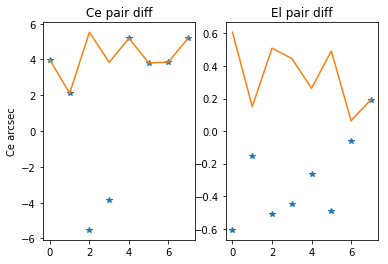

In [17]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
plt.figure()
plt.subplot('120')
plt.plot(pair_diff[:,0],'*')
plt.plot(np.abs(pair_diff[:,0]),'-')
plt.title("El pair diff")
plt.ylabel("El arcsec")
plt.subplot('121')
plt.plot(pair_diff[:,1],'*')
plt.plot(np.abs(pair_diff[:,1]),'-')
plt.title("Ce pair diff")
plt.ylabel("Ce arcsec")


In [18]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )


Fitting rotation, translation and magnification
gamma: 1.0006108790418187
theta: -39.644068270865695 arcmin
dx: 1.1024747750345616 arcsec
dy: 4.984655023227376 arcsec
variances: [4.11192686e-04 1.41357633e+00 3.49021087e-01 3.49021087e-01]

residuals in arcsec: [[ 1.17318472  0.54579993]
 [-0.01797802  1.82609321]
 [ 1.46175773 -5.01449536]
 [ 0.68420164 -2.2945999 ]
 [-0.25537615  4.34532807]
 [-1.11057397  2.24512917]
 [ 0.08082209  2.43193811]
 [-0.45225052  4.16929747]
 [-0.26025613 -1.60154367]
 [ 0.01032764 -1.86938962]
 [-1.68968467 -1.98105369]
 [-0.50696513 -1.39368167]
 [ 0.02409439  1.96014729]
 [ 0.720119    1.10974138]
 [-0.24087447 -0.53630279]
 [ 0.37945184 -3.94240794]]
max residual in EL,CE 1.7, 5.0 arcsec
mean residual in EL,CE 0.8, 2.7 arcsec


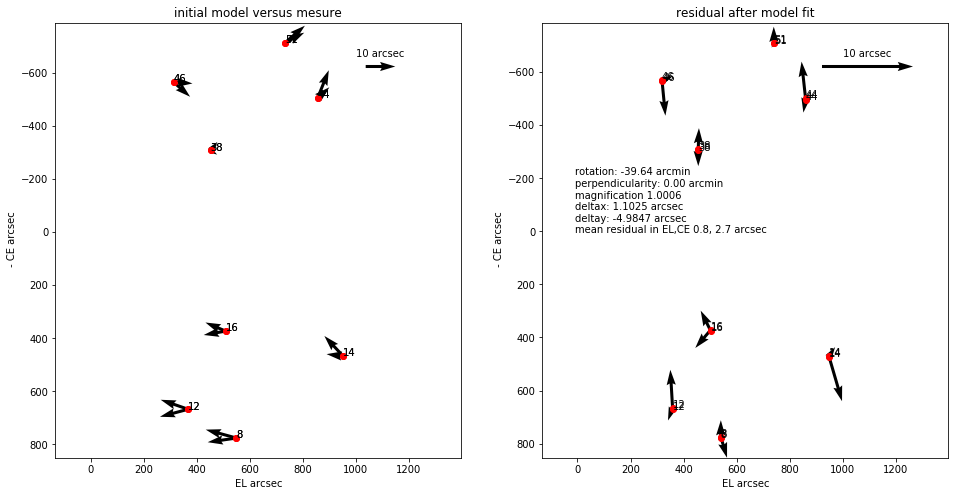

In [19]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

In [23]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180904.pkl')

Dumping to /home/dvibert/ownCloud/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180904.pkl


In [20]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 153.2 arcsec ; CE: 274.2 arcsec
EL: 362.0 arcsec ; CE: 348.7 arcsec
EL: 477.8 arcsec ; CE: -224.2 arcsec
EL: 279.1 arcsec ; CE: -376.4 arcsec
EL: 187.8 arcsec ; CE: -324.7 arcsec
EL: 256.5 arcsec ; CE: -180.8 arcsec
EL: 224.4 arcsec ; CE: 149.9 arcsec
EL: 424.3 arcsec ; CE: 248.1 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 153.2 arcsec ; CE 274.2 arcsec ; image: True
EL: 208.8 arcsec ; CE 74.4 arcsec ; image: True
EL: 115.8 arcsec ;

## Star sequence

gc - s8 - s25 - s31

In [21]:
star_target_path = cloudpath + 'Target_selection/GuidingStars/'

F1_stars = Table.read(star_target_path + "F1_guidingstars.fits", format='fits')

stars = [8, 25, 31]

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 134.8 arcsec ; CE: -159.9 arcsec
EL: 155.5 arcsec ; CE: 48.8 arcsec
EL: 86.8 arcsec ; CE: 107.2 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 134.8 arcsec ; CE -159.9 arcsec ; image: True
EL: 20.7 arcsec ; CE 208.7 arcsec ; image: True
EL: -68.7 arcsec ; CE 58.3 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 68.7 arcsec ; CE -58.3 arcsec ; image: True
EL: -20.7 arcsec ; CE -238.7 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -134.8 arcsec ; CE 159.9 arcsec ; image: True


In [22]:
stars_coord

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.07519354, 0.09142528)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.08673703, -0.02792538)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.04840695, -0.06128789)]>]

------------------------------------------------------

Re-compute model (thermal drift) ?

In [24]:
slits_coord_obs_det2 = np.array([
       [1967.77672211,  420.883372  ],
       [1634.94667484,  284.99941421],
       [1460.30889342, 1343.63228178],
       [1774.05043782, 1625.66456504],
       [1918.36655798, 1531.24794446],
       [1811.96613007, 1264.73988401],
       [1858.73062442,  652.77625595],
       [1539.37281284,  472.87952084],
#retour
       [1538.92830776,  467.65309777],
       [1858.32109489,  647.99384259],
       [1811.64481037, 1260.92668703],
       [1917.94530091, 1526.91879826],
       [1773.67417428, 1628.30043431],
       [1459.76904708, 1347.27853125],
       [1634.04334215,  281.33418915],
       [1966.71028008,  414.34595604]])
    
slits_coord_obs_det2

array([[1967.77672211,  420.883372  ],
       [1634.94667484,  284.99941421],
       [1460.30889342, 1343.63228178],
       [1774.05043782, 1625.66456504],
       [1918.36655798, 1531.24794446],
       [1811.96613007, 1264.73988401],
       [1858.73062442,  652.77625595],
       [1539.37281284,  472.87952084],
       [1538.92830776,  467.65309777],
       [1858.32109489,  647.99384259],
       [1811.64481037, 1260.92668703],
       [1917.94530091, 1526.91879826],
       [1773.67417428, 1628.30043431],
       [1459.76904708, 1347.27853125],
       [1634.04334215,  281.33418915],
       [1966.71028008,  414.34595604]])

In [25]:
valid = np.isfinite(slits_coord_obs_det2[:,0])
#valid = np.array([True]*8 + [False]*8)
obs_wave = G2UV.mask_det_map.w[0]
print("wave: ", obs_wave)

#slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
#slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.20255


Text(0,0.5,'Ce arcsec')

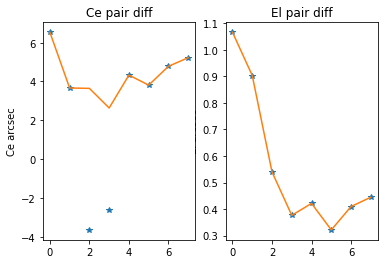

In [26]:
mid  = len(slits_coord_obs_det2)//2
pair_diff2 = slits_coord_obs_det2[:mid] - slits_coord_obs_det2[::-1][:mid]
pair_diff2
plt.figure()
plt.subplot('120')
plt.plot(pair_diff2[:,0],'*')
plt.plot(np.abs(pair_diff2[:,0]),'-')
plt.title("El pair diff")
plt.ylabel("El arcsec")
plt.subplot('121')
plt.plot(pair_diff2[:,1],'*')
plt.plot(np.abs(pair_diff2[:,1]),'-')
plt.title("Ce pair diff")
plt.ylabel("Ce arcsec")


In [30]:
valid2 = np.array([True]*16)
valid2[[0,1,-1,-2]] = False
slits2 = np.array(slits_valid)[valid2]
print(slits2)

['14' '8' '12' '16' '38' '44' '44' '38' '16' '12' '8' '14']


In [31]:
slits_coord_obs2 = G2UV.detector2guider(slits_coord_obs_det2[valid2], wave=obs_wave, angle=True  )
slits_coord_valid2 = [slits_coord[i] for i in np.nonzero(valid2)[0]]
slits_valid2 = np.array(slits + slits[::-1])[valid2]

Fitting rotation, translation and magnification
gamma: 1.0004019970657176
theta: 0.18488190877971084 arcmin
dx: -3.6320027044843672 arcsec
dy: 1.265077405430739 arcsec
variances: [5.47067103e-04 1.88067817e+00 4.63015102e-01 4.63015102e-01]

residuals in arcsec: [[ 6.30954183e-01 -4.05872365e+00]
 [-8.72259151e-03 -1.00583146e+00]
 [-8.73463106e-01  3.26606726e+00]
 [-1.52227671e+00  1.85935435e+00]
 [-5.07748091e-03  2.43003590e+00]
 [ 1.94836082e-01  4.10281673e+00]
 [ 7.04795287e-01 -1.69194866e+00]
 [ 5.30956249e-01 -2.91447063e+00]
 [-1.05544674e+00 -2.36908996e+00]
 [-2.65510735e-01 -1.53327703e+00]
 [ 4.14200160e-01  1.91556693e+00]
 [ 1.25475541e+00 -4.99766750e-04]]
max residual in EL,CE 1.5, 4.1 arcsec
mean residual in EL,CE 0.8, 2.5 arcsec


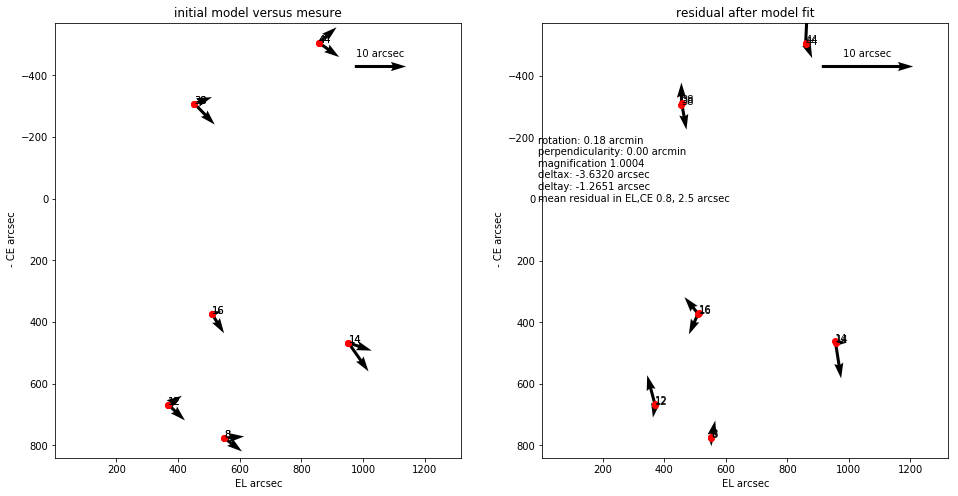

In [33]:
weight = np.array( [1.]*14  + [1./(1. + 1e-1)]*14)

G2UVcor2 = G2UV.update_model(slits_coord_valid2, slits_coord_obs2, labels=slits_valid2, plot=True)

In [34]:
star_movs2, stars_coord2 = G2UVcor2.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 130.5 arcsec ; CE: -159.6 arcsec
EL: 153.7 arcsec ; CE: 48.9 arcsec
EL: 85.6 arcsec ; CE: 108.0 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 130.5 arcsec ; CE -159.6 arcsec ; image: True
EL: 23.2 arcsec ; CE 208.5 arcsec ; image: True
EL: -68.1 arcsec ; CE 59.1 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 68.1 arcsec ; CE -59.1 arcsec ; image: True
EL: -23.2 arcsec ; CE -238.5 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -130.5 arcsec ; CE 159.6 arcsec ; image: True


In [35]:
movs_new2, slits_coord_new2 = G2UVcor2.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 154.1 arcsec ; CE: 274.3 arcsec
EL: 363.7 arcsec ; CE: 346.4 arcsec
EL: 472.7 arcsec ; CE: -227.8 arcsec
EL: 272.2 arcsec ; CE: -377.7 arcsec
EL: 181.6 arcsec ; CE: -325.0 arcsec
EL: 251.9 arcsec ; CE: -181.9 arcsec
EL: 223.8 arcsec ; CE: 149.2 arcsec
EL: 424.8 arcsec ; CE: 245.2 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 154.1 arcsec ; CE 274.3 arcsec ; image: True
EL: 209.7 arcsec ; CE 72.1 arcsec ; image: True
EL: 109.0 arcsec ;